## 📚 **Latar Belakang Masalah**
Kesenjangan pendapatan dan faktor demografi memainkan peran penting dalam membentuk tenaga kerja. Dengan meneliti karakteristik karyawan dan pendapatan, proyek ini bertujuan untuk mengidentifikasi faktor-faktor kunci yang memengaruhi penghasilan, jenis pekerjaan, dan aspek lain dari tenaga kerja. Dataset ini membantu mengungkap wawasan tentang bagaimana pendidikan, jam kerja, dan demografi berkaitan dengan kategori pendapatan, memungkinkan pemahaman yang lebih mendalam tentang distribusi upah dan tren pekerjaan.

## 📊 **Gambaran Umum Dataset**
Dataset yang digunakan dalam proyek ini terdiri dari fitur-fitur yang terkait dengan demografi karyawan dan karakteristik pekerjaan. Berikut adalah fitur-fitur utama yang termasuk dalam dataset:

- **age**: Umur pekerja, direpresentasikan sebagai angka.
- **workclass**: Kelas atau jenis pekerjaan (misalnya, pemerintahan, sektor swasta).
- **fnlwgt**: Bobot akhir yang mewakili jumlah orang dengan karakteristik yang sama dengan pekerja.
- **education**: Tingkat pendidikan terakhir.
- **education.num**: Tingkat pendidikan terakhir namun direpresentasikan sebagai angka.
- **marital.status**: Status pernikahan pekerja.
- **pekerjaan**: Pekerjaan atau profesi spesifik.
- **relationship**: Status hubungan dalam keluarga (misalnya, suami, istri).
- **race**: Etnis pekerja.
- **sex**: Jenis kelamin pekerja.
- **capital.gain**: Pendapatan dalam dolar.
- **capital.loss**: Pengeluaran terkait dengan persyaratan pekerjaan.
- **hours.per.week**: Jumlah jam kerja per minggu.
- **native.country**: Negara asal pekerja.
- **income**: Kategori pendapatan pekerja, baik ≤50K atau >50K.
<br>
<br>
---

## 1. Data Understanding

### • Load library umum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

### • Load Dataset

In [2]:
df = pd.read_csv('Adult census income dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
print(f'Dataset ini memiliki {df.shape[0]} baris dan {df.shape[1]} kolom') 

Dataset ini memiliki 32561 baris dan 15 kolom


## 1.1 Exploratory Data Analysis

### • Melihat tipe data dan jumlah value yang hilang dari dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Dari sini, kita dapat melihat bahwa tidak ada nilai yang hilang pada dataset.

### • Melihat deskripsi data dari kolom yang tipe datanya numerical dan categorical

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


### • Menampilkan semua unique value dari kolom categorical

In [8]:
unique_values = {}
for col in df.select_dtypes(include='object').columns:
    unique_values[col] = df[col].unique()

unique_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique_Values'])

print("Unique Values per Categorical Column:")
unique_df

Unique Values per Categorical Column:


,Column,Unique_Values
0,workclass,"[?, Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked]"
1,education,"[HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool]"
2,marital.status,"[Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse]"
3,occupation,"[?, Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]"
4,relationship,"[Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife]"
5,race,"[White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo]"
6,sex,"[Female, Male]"
7,native.country,"[United-States, ?, Mexico, Greece, Vietnam, China, Taiwan, India, Philippines, Trinadad&Tobago, Canada, South, Holand-Netherlands, Puerto-Rico, Poland, Iran, England, Germany, Italy, Japan, Hong, Honduras, Cuba, Ireland, Cambodia, Peru, Nicaragua, Dominican-Republic, Haiti, El-Salvador, Hungary, Columbia, Guatemala, Jamaica, Ecuador, France, Yugoslavia, Scotland, Portugal, Laos, Thailand, Outlying-US(Guam-USVI-etc)]"
8,income,"[<=50K, >50K]"


Berdasarkan nilai unik pada setiap kolom kategorikal, kita dapat melihat bahwa terdapat beberapa kolom yang memiliki nilai ?. Nilai ? ini kemungkinan merupakan nilai yang kosong atau nilai yang hilang. selain itu kolom native.country juga memiliki banyak unique value (42).

In [9]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

Pada kolom native-country nilai United-States proporsinya sekitar 90%

### • Cek ada berapa nilai '?' pada setiap kolom

In [10]:
for col in df.columns:
    count = df[col][df[col] == '?'].count()
    if count != 0:
        print(col, count)

workclass 1836
occupation 1843
native.country 583


Terdapat tiga kolom dalam DataFrame yang mengandung nilai ``?``, yang kemungkinan menunjukkan data yang tidak tersedia atau kosong. Oleh karena itu, hal ini perlu ditangani dalam preprocessing data.

### • Cek baris yang duplikat

In [11]:
df.duplicated().sum()

24

Terdapat 24 baris yang duplikat pada dataset. walaupun tidak banyak, baris ini harus tetap ditangani dalam preprocessing data 

### • Cek distribusi nilai target

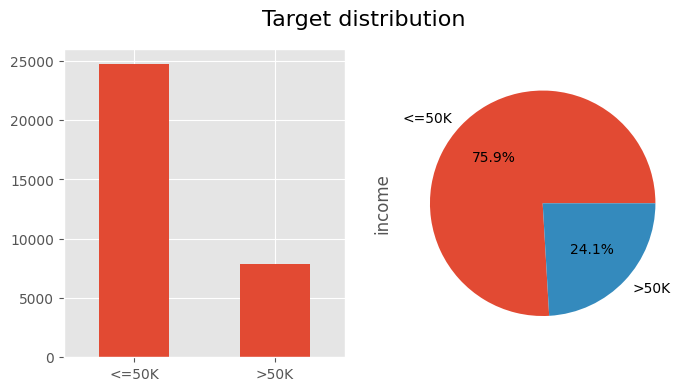

In [12]:
plt.figure(figsize=(8, 4))
plt.suptitle('Target distribution', fontsize=16)

plt.subplot(1, 2, 1)
df['income'].value_counts().plot(kind='bar', rot=0)

plt.subplot(1, 2, 2)
df['income'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.show()

Variable target dataset ini tidak seimbang (imbalanced), dengan jumlah data kategori <=50K lebih banyak dibandingkan >50K.
Ketidakseimbangan ini perlu diperhatikan dalam proses analisis atau pelatihan model machine learning, karena dapat memengaruhi performa model, khususnya pada prediksi kategori minoritas (>50K).

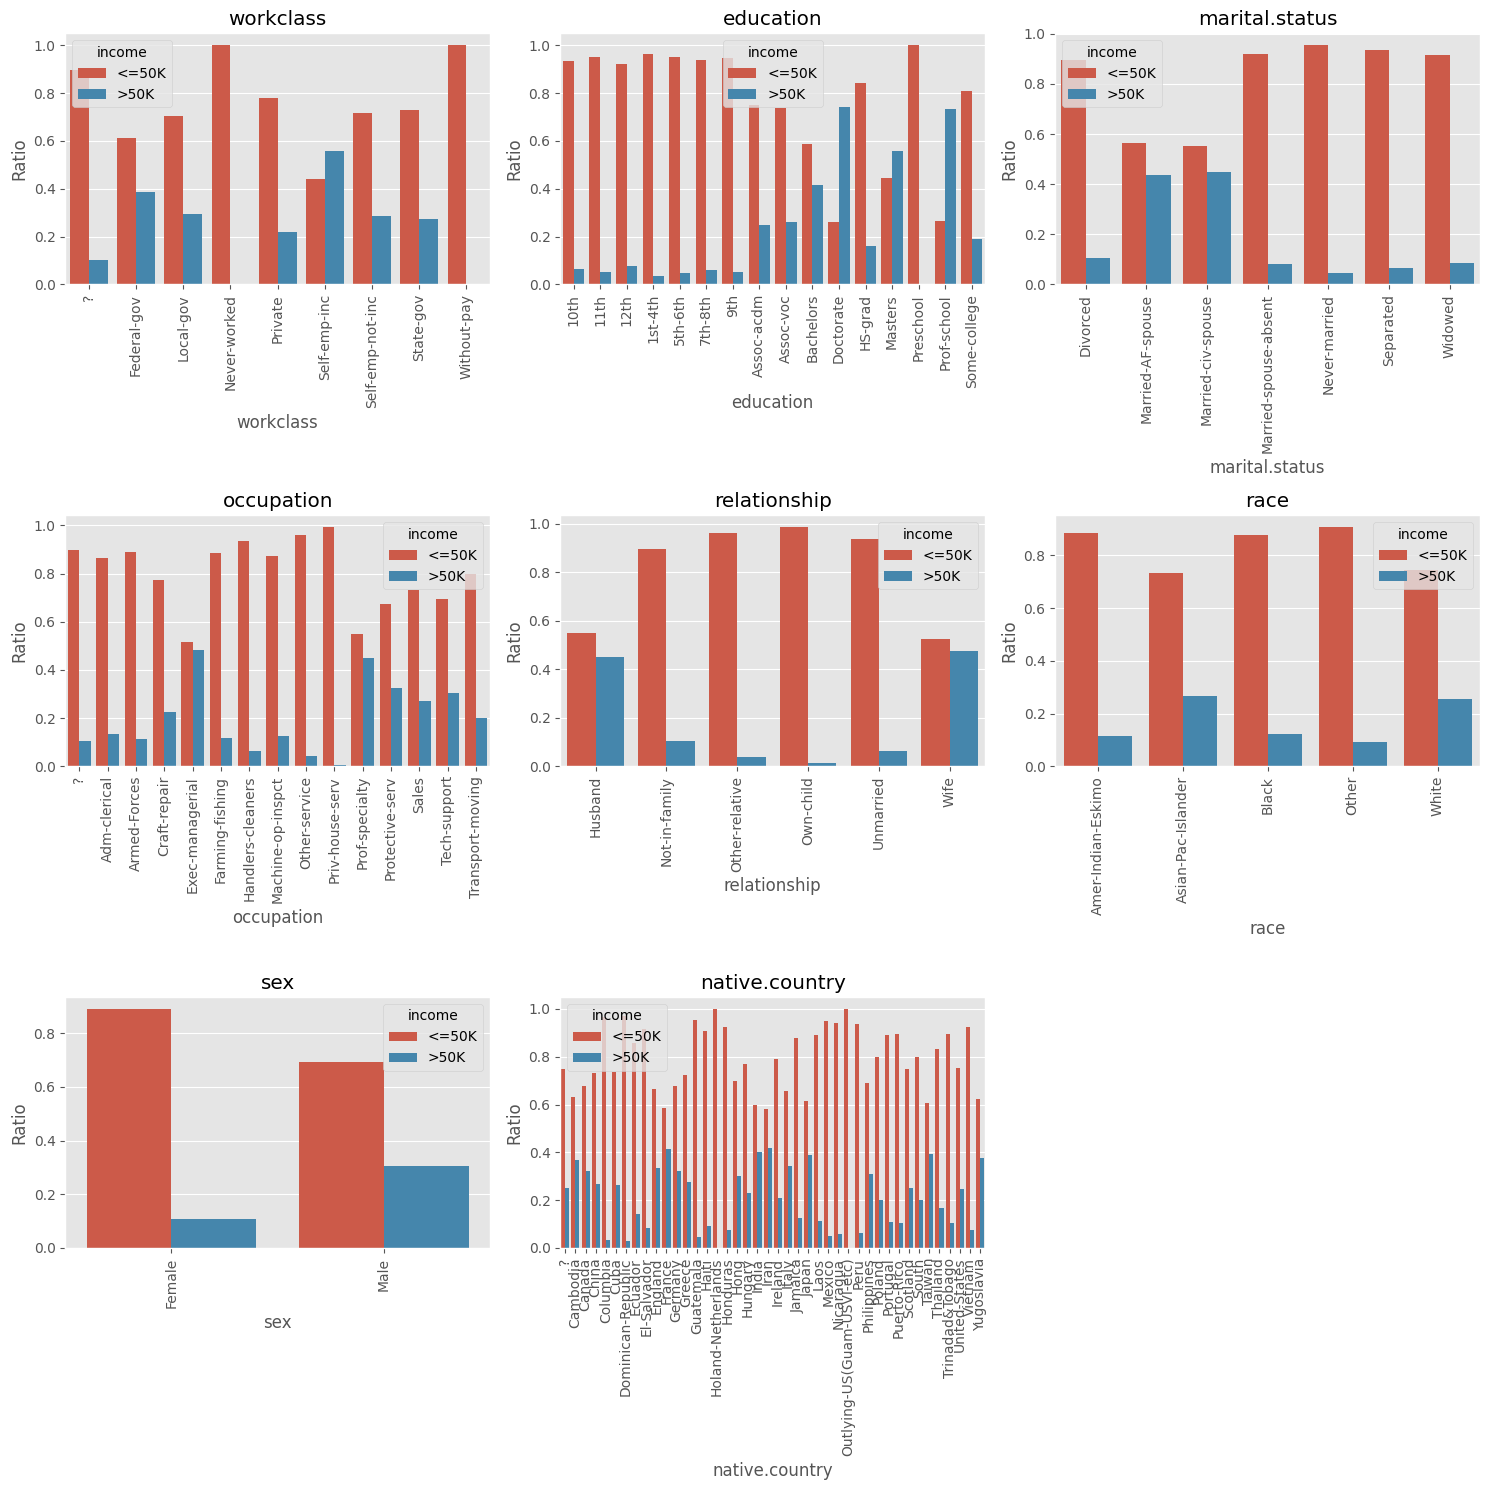

In [13]:
def countplot_on_income_grid_as_ratio(df):
    # Mendapatkan semua kolom bertipe 'object' (kecuali 'income' jika ada)
    object_columns = [col for col in df.select_dtypes(include='object').columns if col != 'income']
    
    n_cols = 3  # Menentukan jumlah kolom dalam grid
    n_rows = (len(object_columns) + n_cols - 1) // n_cols  # Menghitung jumlah baris yang dibutuhkan
    
    # Mengatur ukuran figure
    plt.figure(figsize=(n_cols * 5, n_rows * 5))
    
    # Loop melalui semua kolom bertipe 'object' dan buat barplot untuk rasio masing-masing
    for index, col in enumerate(object_columns):
        # Menghitung proporsi setiap kategori dalam kolom berdasarkan 'income'
        prop_df = df.groupby([col, 'income']).size().reset_index(name='count')
        total_df = df.groupby(col).size().reset_index(name='total')
        merged_df = pd.merge(prop_df, total_df, on=col)
        merged_df['ratio'] = merged_df['count'] / merged_df['total']
        
        plt.subplot(n_rows, n_cols, index + 1)  # Menentukan posisi subplot
        sns.barplot(x=col, y='ratio', hue='income', data=merged_df)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.ylabel('Ratio')
        plt.tight_layout()

    plt.show()

# Contoh penggunaan
countplot_on_income_grid_as_ratio(df)

## Insight Berdasarkan Visualisasi Data

Berdasarkan analisis visual dari beberapa kolom kategori terhadap variabel target `income`, kami dapat mengambil beberapa insight yang dapat menyederhanakan dan mungkin meningkatkan kinerja model machine learning:

1. **Kolom education**:
   - Berdasarkan rasio individu dengan `income >50k` pada berbagai kategori education, terlihat pola yang jelas. Kita bisa mengelompokkan kolom `education` menjadi tiga kelas:
     - **Rendah**: Kategori di mana rasio `income >50k` relatif rendah, yang menunjukkan potensi pendapatan yang lebih rendah (TK, kelas 1-4, kelas 10, kelas 11, kelas 12, kelas 5-6, kelas 7-8, kelas 9).
     - **Menengah**: Kategori dengan rasio `income >50k` yang sedang, menunjukkan potensi pendapatan menengah (Asosiasi akademik, Asosiasi vokasional, Sarjana, SMA Grad, Diploma).
     - **Tinggi**: Kategori dengan rasio `income >50k` yang tinggi, menunjukkan potensi pendapatan yang lebih tinggi (Doktor, Magister, Proffesor).

2. **Kolom relationship**:
   - Kolom `relationship` dapat disederhanakan menjadi dua kategori: 
     - **Suami atau Istri**: Individu yang berstatus sebagai suami atau istri, yang cenderung memiliki rasio `income >50k` lebih tinggi.
     - **Bukan Suami atau Istri**: Individu dengan status lain seperti belum menikah, yang memiliki rasio `income >50k` lebih rendah.

3. **Kolom marital.status**:
   - Kolom `marital.status` bisa dibagi menjadi dua kategori besar:
     - **Menikah**: Termasuk individu yang berstatus menikah atau pernah menikah.
     - **Belum Menikah**: Termasuk individu yang belum pernah menikah. 
     - Hal ini didasarkan pada rasio yang menunjukkan bahwa individu yang menikah cenderung memiliki rasio `income >50k` lebih tinggi.

4. **workclass dan occupation**:
   - Dari kedua grafik ini terlihat bahwa semakin tinggi jabatan atau kelas pekerjaan seseorang, semakin tinggi pula rasio orang tersebut memiliki pendapatan yang lebih besar (`income >50k`).
   - Contohnya, **self-emp-inc** dan **prof-specialty** memiliki rasio pendapatan tinggi yang jauh lebih besar dibandingkan kelas pekerjaan lain seperti **priv-house-serv** atau **handlers-cleaners**.
   - Kategori jabatan tinggi seperti **federal-gov** dan **pengusaha besar di berbagai sektor** juga menunjukkan rasio `income >50k` yang lebih tinggi dibandingkan kategori pekerjaan dengan otoritas yang lebih rendah seperti **pekerjaan tanpa bayaran** atau **pekerjaan sektor lain yang lebih rendah**.

5. **native.country**
   - Dari grafik native.country ini terlihat bahwa asal negara dari seseorang tidak terlalu mempengaruhi besar income.

In [14]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


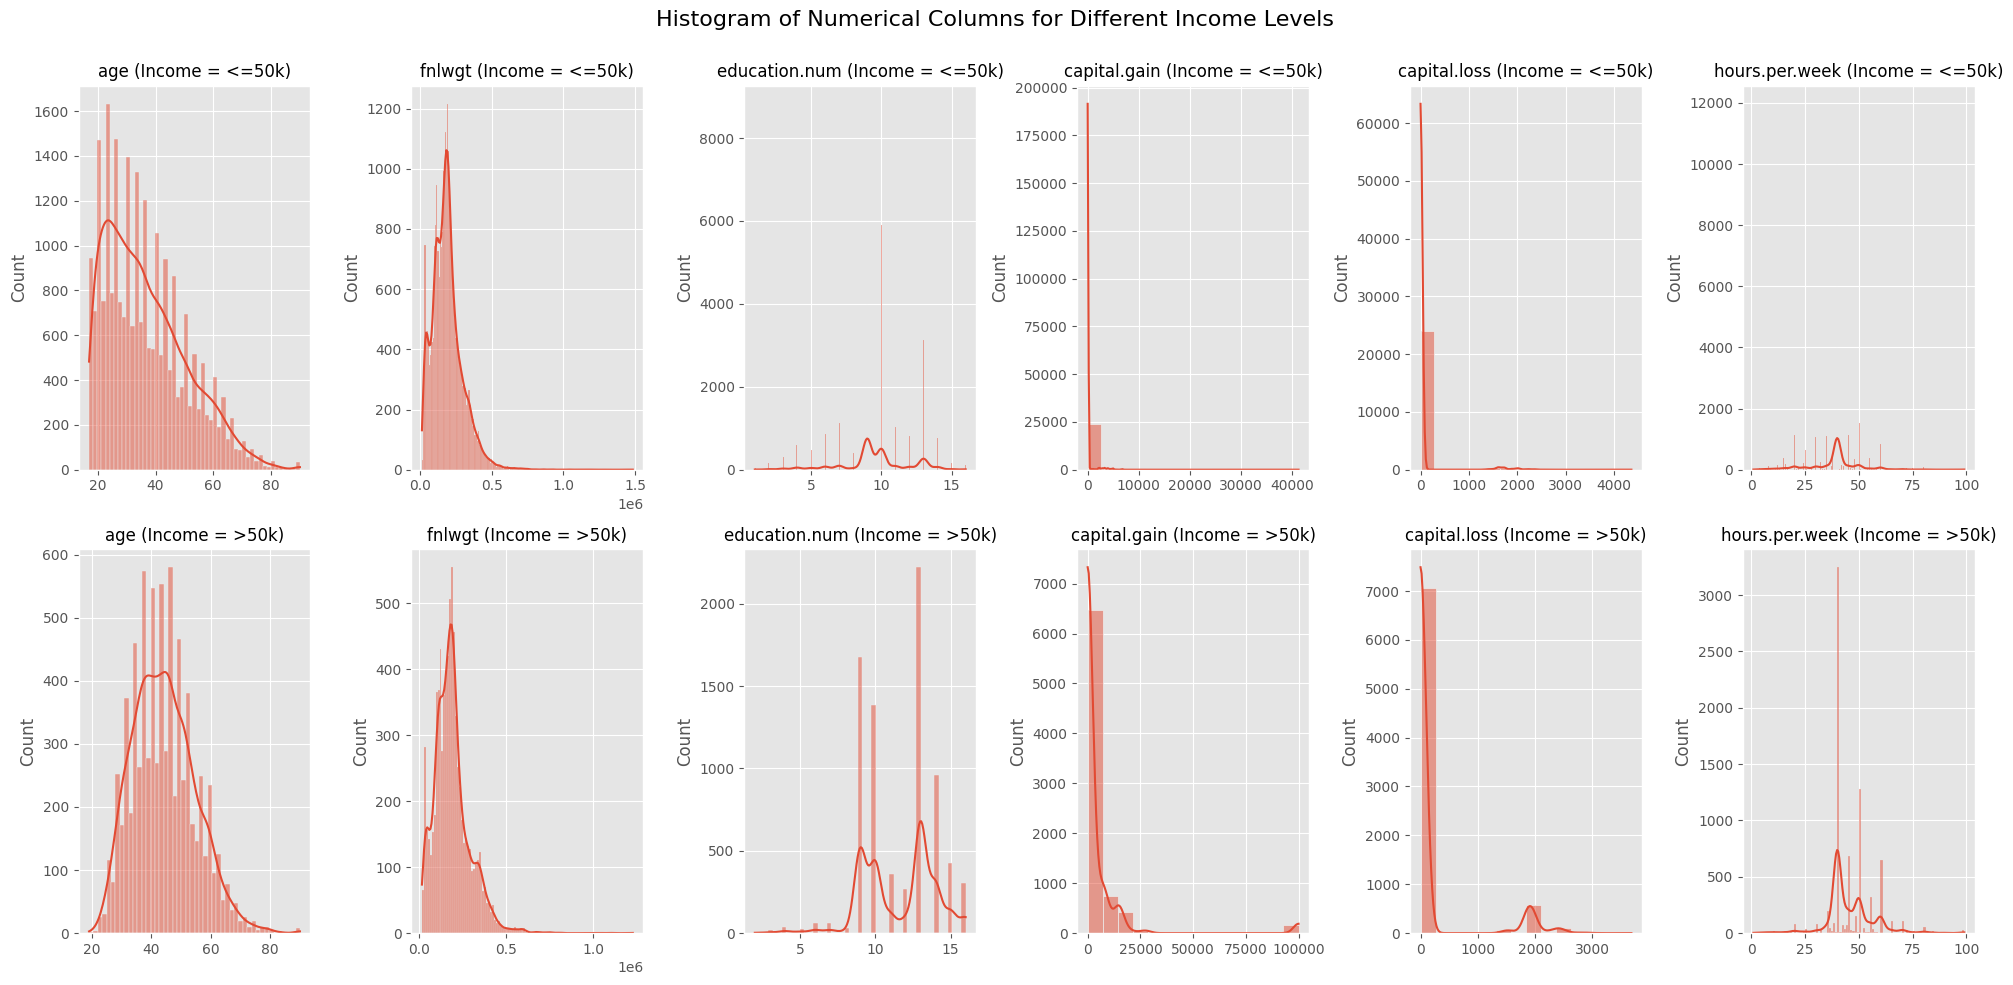

In [15]:
poor = df[df['income'] == '<=50K']
rich = df[df['income'] == '>50K']

columns = poor.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 10))
plt.suptitle('Histogram of Numerical Columns for Different Income Levels\n', fontsize=16)

for i, column in enumerate(columns, 1):
    for j, (data, income_label) in enumerate(zip([poor, rich], ['<=50k', '>50k'])):
        plt.subplot(2, len(columns), i + j * len(columns))
        plt.title(f'{column} (Income = {income_label})', fontsize=12)
        sns.histplot(data[column], kde=True)
        plt.xlabel('')

plt.tight_layout()
plt.show()

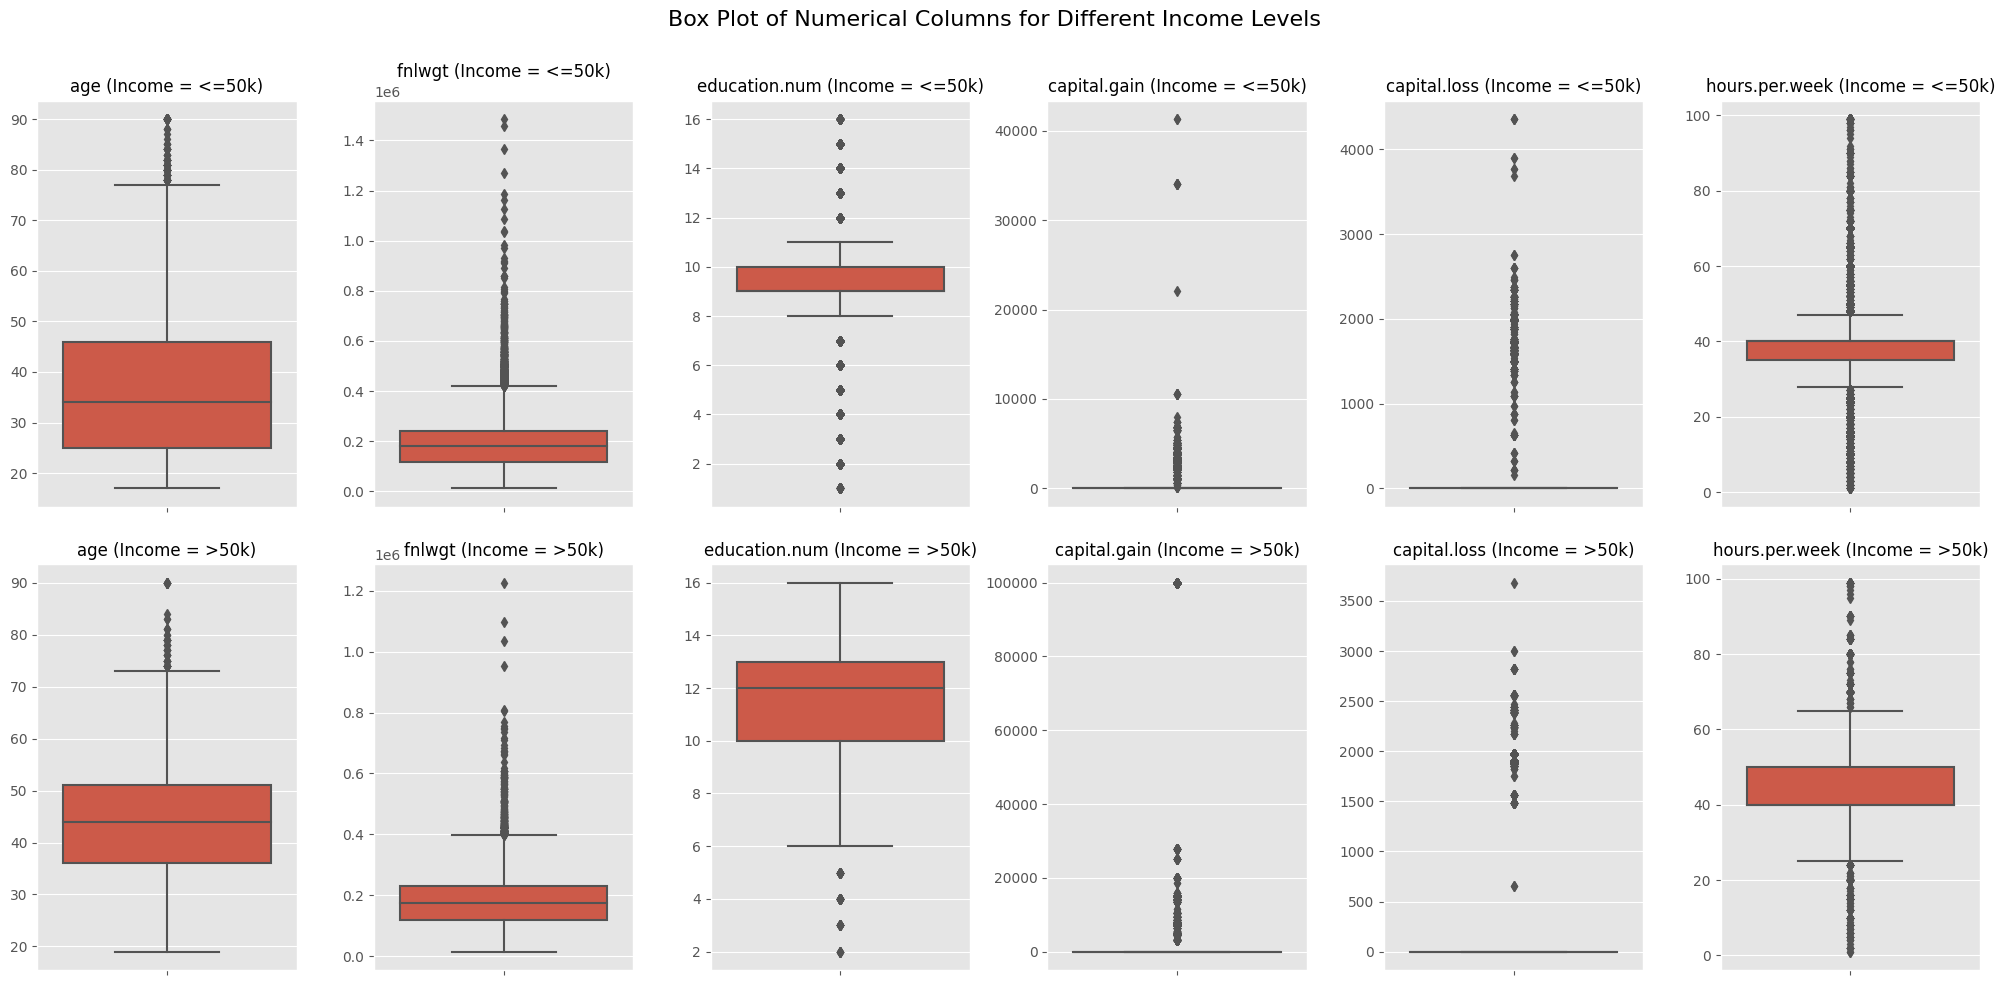

In [16]:
plt.figure(figsize=(20, 10))
plt.suptitle('Box Plot of Numerical Columns for Different Income Levels\n', fontsize=16)

for i, column in enumerate(columns, 1):
    for j, (data, income_label) in enumerate(zip([poor, rich], ['<=50k', '>50k'])):
        plt.subplot(2, len(columns), i + j * len(columns))
        plt.title(f'{column} (Income = {income_label})', fontsize=12)
        sns.boxplot(data=data, y=column)
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [17]:
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

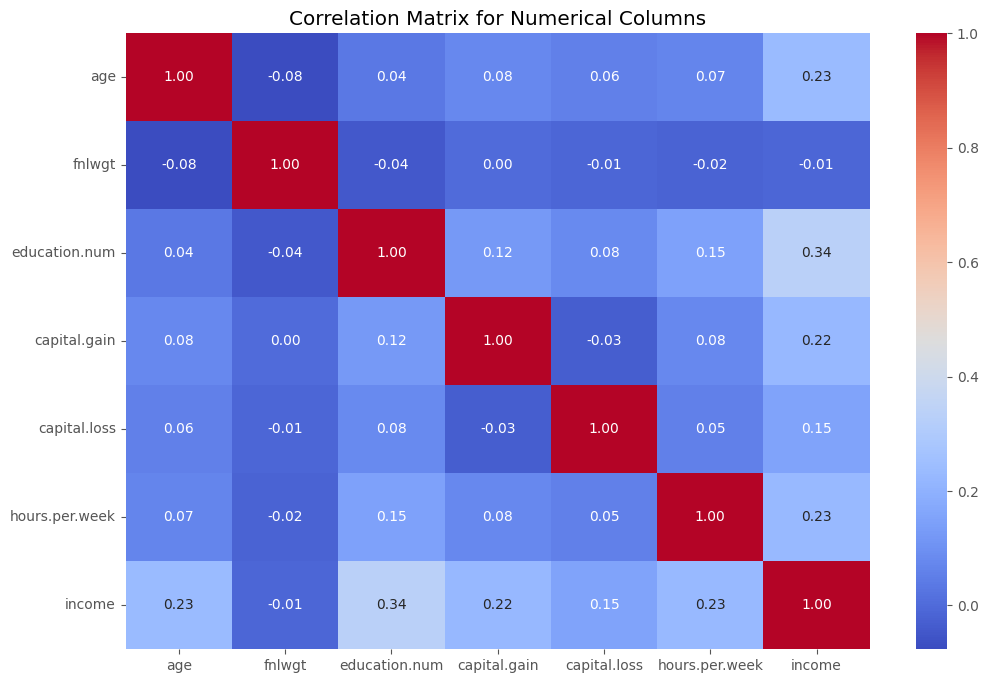

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns 
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


### Insight untuk numerical columns

1. **Kolom fnlwgt**: 
   - Kolom ``fnlwgt`` tidak memiliki korelasi yang signifikan terhadap kolom target (`income`). 
   - Karena kolom ini tidak memberikan informasi yang berarti untuk memprediksi nilai target (`income`), maka disarankan untuk melakukan drop terhadap kolom ini dari dataset.


## 2. Data Preparation

### • Handle baris yang null

Ganti row yang memiliki '?' menjadi nan agar bisa dilakukan pemrosesan lebih lanjut. Preprocessing steps ini dilakukan untuk menangani missing values dalam dataset dengan mengisi nilai yang hilang menggunakan modus dari kolom yang bersangkutan. Tujuan dari langkah-langkah ini adalah memastikan tidak ada missing values dalam dataset yang bisa mengganggu proses pelatihan model machine learning. 

In [19]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Handle Missing value di kolom `workclass` `occupation` `native.country`

In [20]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0], inplace=True)

### • Drop kolom yang tidak memiliki korelasi terhadap target variable

Menghilangkan kolom yang tidak memiliki korelasi atau kontribusi signifikan terhadap variabel target, sehingga model machine learning dapat fokus pada fitur-fitur yang lebih relevan, meningkatkan efisiensi dan akurasi.

In [21]:
df.drop(columns=['fnlwgt','native.country'], inplace=True)

### • Kolom education & education.num

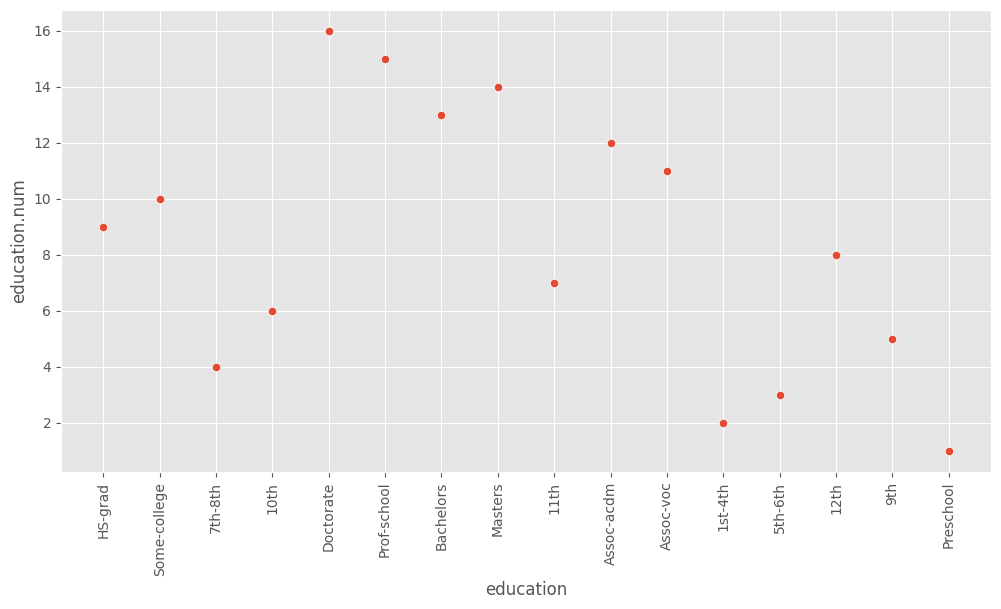

In [22]:
#plot x as education and y as education.num
plt.figure(figsize=(12, 6))
sns.scatterplot(x='education', y='education.num', data=df)
plt.xticks(rotation=90) 
plt.show()


Dari sini kita bisa lihat bahwa setiap education memiliki nilai angkanya masing masing dan angka tersebut konsisten pada seluruh dataset. oleh karena itu kolom `education` tidak diperlukan lagi karena nilainya sudah terwakilkan oleh kolom `education.num`

### • Group kolom education.num berdasarkan ratio income

Melakukan pengelompokan nilai pada kolom `education.num` berdasarkan ratio income. Proses ini bertujuan untuk menyederhanakan data pada kolom `education.num` dengan mengelompokkan nilainya ke dalam 3 kategori numerik sehingga mempermudah proses analisis. 

In [23]:
df['education.num'].replace([1,2,6,7,8,3,4,5], 0, inplace=True)
df['education.num'].replace([14,15,16], 2, inplace=True)
df['education.num'].replace([9,10,11,12,13,14], 1, inplace=True)


In [24]:
df.drop('education', axis=1, inplace=True)

### • Kolom workclass dan occupation

In [25]:

df['workclass'].replace(['Never-worked', 'Without-pay'], 'Not wokring', inplace=True)
df['workclass'].replace(['Private','State-gov','Self-emp-not-inc','Local-gov'], 'Middle class', inplace=True)
df['workclass'].replace(['Federal-gov','Self-emp-inc'], 'High class', inplace=True)

In [26]:

df['occupation'].replace(['Priv-house-serv','Other-service','Handlers-cleaners','Farming-fishing','Machine-op-inspct','Adm-clerical','Transport-moving','Craft-repair','Sales','Armed-Forces'], 'Low income', inplace=True)
df['occupation'].replace(['Tech-support','Protective-serv','Prof-specialty','Exec-managerial'], 'High income', inplace=True)

### • Kolom marital.status

Melakukan pengelompokkan data pada kolom `marital.status` ke dalam 2 kategori numerik untuk menyederhanakan analisis. 

In [27]:
df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 1, inplace=True)
df['marital.status'].replace(['Divorced', 'Separated', 'Widowed','Married-spouse-absent','Never-married'], 0, inplace=True)

### • Kolom relationship

Melakukan pengelompokkan data pada kolom `relationship` ke dalam 2 kategori numerik untuk menyederhanakan analisis. 

In [28]:
df['relationship'].replace(['Wife', 'Husband'], 'Married', inplace=True)
df['relationship'].replace(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative'], 'Not Married', inplace=True)

### • Encode categorical columns

In [29]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Middle class,1,0,High income,Not Married,White,Female,0,4356,40,0
1,82,Middle class,1,0,High income,Not Married,White,Female,0,4356,18,0
2,66,Middle class,1,0,High income,Not Married,Black,Female,0,4356,40,0
3,54,Middle class,0,0,Low income,Not Married,White,Female,0,3900,40,0
4,41,Middle class,1,0,High income,Not Married,White,Female,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Middle class,1,0,High income,Not Married,White,Male,0,0,40,0
32557,27,Middle class,1,1,High income,Married,White,Female,0,0,38,0
32558,40,Middle class,1,1,Low income,Married,White,Male,0,0,40,1
32559,58,Middle class,1,0,Low income,Not Married,White,Female,0,0,40,0


In [ ]:
#one hot encoder
df = pd.get_dummies(df, drop_first=True)

#label encoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# columns = [x for x in df.columns if df[x].dtype == 'object']

# for col in columns:
#     df[col] = le.fit_transform(df[col])
#     print(dict(zip(le.classes_, le.transform(le.classes_))))


### • Kolom capital.gain dan capital.loss

In [31]:
df['capital'] = df['capital.gain'] - df['capital.loss']
df.drop(['capital.gain','capital.loss'], axis=1, inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = [x for x in df.columns if x != 'income']

df[columns] = scaler.fit_transform(df[columns])

df

ValueError: could not convert string to float: 'Middle class'